This is a small example that demonstrates that one of the key differences between Ridge and Lasso regularization is interpretation.  


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score

We will use the `sklearn` package in order to perform ridge regression and
the lasso. The main functions in this package that we care about are `Ridge()`, which can be used
to fit ridge regression models, and `Lasso()` which will fit lasso models. They also have cross-validated counterparts: `RidgeCV()` and `LassoCV()`. We'll use these a bit later.

Before proceeding, let's first ensure that the missing values have
been removed from the data, as described in the previous lab.

In [15]:
df = pd.read_csv('../data/Hitters.csv').dropna()
df.head()
#dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [19]:

dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
X_ = df.drop(['Name','Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
y = df.Salary

In [30]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

We will now perform ridge regression and the lasso in order to predict `Salary` on
the `Hitters` data. Let's set up our data:

In [31]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# 6.6.1 Ridge Regression
The `Ridge()` function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [28]:
alphas = 10**np.linspace(10,-2,40)
alphas

array([1.00000000e+10, 4.92388263e+09, 2.42446202e+09, 1.19377664e+09,
       5.87801607e+08, 2.89426612e+08, 1.42510267e+08, 7.01703829e+07,
       3.45510729e+07, 1.70125428e+07, 8.37677640e+06, 4.12462638e+06,
       2.03091762e+06, 1.00000000e+06, 4.92388263e+05, 2.42446202e+05,
       1.19377664e+05, 5.87801607e+04, 2.89426612e+04, 1.42510267e+04,
       7.01703829e+03, 3.45510729e+03, 1.70125428e+03, 8.37677640e+02,
       4.12462638e+02, 2.03091762e+02, 1.00000000e+02, 4.92388263e+01,
       2.42446202e+01, 1.19377664e+01, 5.87801607e+00, 2.89426612e+00,
       1.42510267e+00, 7.01703829e-01, 3.45510729e-01, 1.70125428e-01,
       8.37677640e-02, 4.12462638e-02, 2.03091762e-02, 1.00000000e-02])

We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used. Let's plot and find out:

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression and the lasso:

It looks like we are indeed improving over regular least-squares!

Instead of arbitrarily choosing alpha $ = 4$, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, `RidgeCV()`. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument `cv`.

In [58]:
ridgecv = RidgeCV(alphas = alphas,cv = 5)
ridgecv.fit(X_train, y_train)
bestalpha = ridgecv.alpha_
print(bestalpha)
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train,y_train)
ridge4.score(X_test, y_test)

49.238826317067314


0.4225178250163234

In [59]:
pd.Series(ridge4.coef_, index = X.columns)

AtBat         -14.215874
Hits           64.979938
HmRun         -11.821717
Runs           13.685084
RBI            37.985555
Walks          41.650542
Years          -4.158799
CAtBat         14.563845
CHits          44.123903
CHmRun         59.209231
CRuns          34.449179
CRBI           57.898335
CWalks        -15.548299
PutOuts        75.257288
Assists        -9.614693
Errors          7.072769
League_N        9.296952
Division_W    -47.195799
NewLeague_N     8.168018
dtype: float64

As expected, none of the coefficients are exactly zero - ridge regression does not
perform variable selection!

# 6.6.2 The Lasso
We saw that ridge regression with a wise choice of alpha can outperform least
squares as well as the null model on the Hitters data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the `Lasso()` function; however, this time we'll need to include the argument `max_iter = 10000`.
Other than that change, we proceed just as we did in fitting a ridge model:

Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

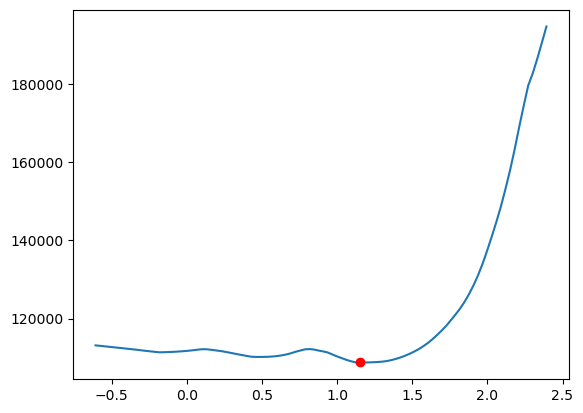

In [70]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000)
lassocv.fit(X_train, y_train)
alphas = lassocv.alphas_
thealpha = lassocv.alpha_
mse_path = lassocv.mse_path_
plt.plot(np.log10(alphas),np.mean(mse_path,axis = 1))
plt.plot(np.log10(thealpha),np.mean(mse_path[alphas == thealpha,:]),'ro')
#lasso.set_params(alpha=lassocv.alpha_)
#lasso.fit(X_train, y_train)
#mean_squared_error(y_test, lasso.predict(X_test))

In [71]:
lasso = Lasso()
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.4112849770718028

In [72]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat           -0.000000
Hits            90.591352
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           33.038595
Years           -0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          27.981999
CRuns            0.000000
CRBI           163.191142
CWalks          -0.000000
PutOuts         83.611845
Assists         -0.000000
Errors           0.000000
League_N         0.194500
Division_W     -46.309345
NewLeague_N      2.063234
dtype: float64

/home/ramesh/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


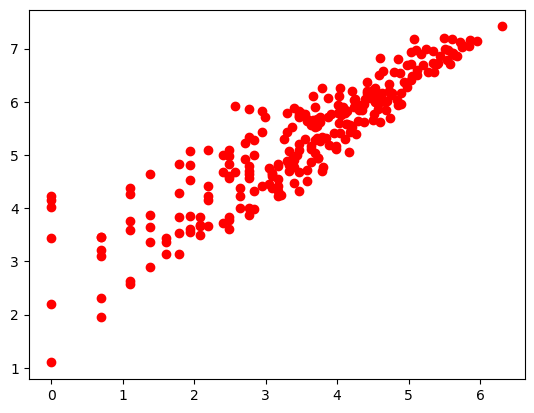

In [74]:
plt.plot(np.log(X['CHmRun']),np.log(X['CRBI']),'ro')

In [ ]:
Its tricky to interpret relative lasso weights.  